In [1]:
%matplotlib inline
from ipywidgets import *
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import numpy as np
import scipy.stats as stats
import matplotlib.patches as mpatches

In [2]:
def chi_sq(k=1):
    fig, axes = plt.subplots(figsize=(10,5))
    x = np.linspace(0, 30, 1000)
    chi2 = stats.chi2.pdf(x, k)
    plt.plot(x, chi2)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(r"$\chi^2($k="+str(k)+"$)$")
    #plt.xlim(0,80)
    plt.grid()
    
def c_crit():
    k=5
    chi_sq(k-1)
    c = stats.chi2.ppf(0.95, k-1)
    x = np.linspace(c,30,100)
    y = stats.chi2.pdf(x, k-1)
    plt.fill_between(x, y, color="#ff4c4c", alpha=0.5)

## Analiza danych jakościowych

### Schemat postępowania

-  Sformułowanie $H_0$ i $H_1$
-  Obliczenie (oczekiwanych) liczności zdarzeń przy założeniu prawdziwości $H_0$
-  Obliczenie wartości statystyki -- na podstawie różnicy między licznościami oczekiwanymi a zaobserwowanymi
-  Porównanie z wartością krytyczną/obliczenie p-wartości
-  Decyzja

### Rozkład $\chi^2$

$Z_i \sim N(0,1)$

$$Q = \sum_{i=1}^{k}Z_i^2$$

$$Q \sim \chi^2(k)$$

In [3]:
interact(chi_sq, k=(1,40,1))

interactive(children=(IntSlider(value=1, description='k', max=40, min=1), Output()), _dom_classes=('widget-int…

<function __main__.chi_sq(k=1)>

### Test zgodności $\chi^2$

- k: liczba kategorii

-  Układ hipotez:

$\;\;\;\;\;H_0: p_i = p_i^0 \textrm{ dla } i = 1, 2, ..., k$

$\;\;\;\;\;H_1: \exists_i p_i \neq p_i^0$

-  Statystyka testowa:

$$\chi^2=\sum_{i=1}^{k}\frac{(O_i-E_i)^2}{E_i}$$

-  Liczebności oczekiwane:

$$E_i = p_i * N$$

-  Założenia:

$\;\;\;\;\;$niezależność obserwacji

$\;\;\;\;\;\forall_i E_i > 5$

-  Stopnie swobody:

$\;\;\;\;\;df = k -1$

### Zbiór krytyczny

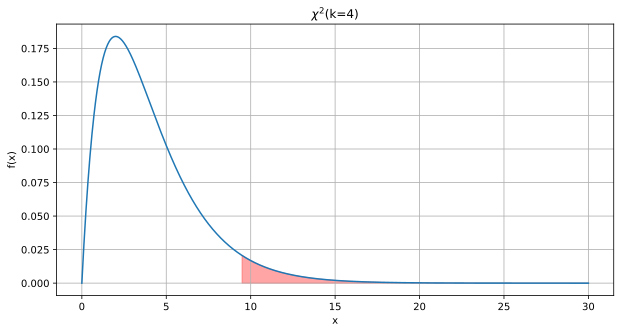

In [4]:
c_crit()

### Test zgodności $\chi^2$ - przykład

Dane producenta:

|Iron Man | Thor | Kapitan Ameryka|
|---|---|---|
|60\% | 30\% | 10\% |

Dane z próbki:

|Iron Man | Thor | Kapitan Ameryka|
|---|---|---|
|45/100 | 50/100 | 5/100 |

$\alpha=0.05$

$H_0: p_1=0.6\textrm{, }p_2=0.3\textrm{, }p_3=0.1$

$H_1:  \exists_i p_i \neq p_i^0$

$E_1 = 100 * 0.6 = 60$

$E_2 = 100 * 0.3 = 30$

$E_3 = 100 * 0.1 = 10$

$\chi^2=\sum_{i=1}^{k}\frac{(O_i-E_i)^2}{E_i} = \frac{(45 - 60)^2}{60} + \frac{(50 - 30)^2}{30} + \frac{(5 - 10)^2}{10} = 19.58$

$P(\chi^2>19.58) = 0.0001$

Odrzucamy $H_0$ na rzecz $H_1$

### Test niezależności $\chi^2$

-  Układ hipotez:

$\;\;\;\;\;H_0: \textrm{ zmienne są niezależne}$
 
$\;\;\;\;\;H_1: \textrm{ zmienne są zależne}$

-  Statystyka testowa:

 $$\chi^2=\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{w}\frac{(O_{ij}-E_{ij})^2}{E_{ij}}$$
 
- Liczebności oczekiwane:

$\;\;\;\;\;E_{ij} = (W_i * K_j) / N$

$\;\;\;\;\;W_i$ - suma $i$-tego wiersza

$\;\;\;\;\;K_j$ - suma $j$-tej kolumny

-  Stopnie swobody:

$\;\;\;\;\;w$ - liczba wierszy 

$\;\;\;\;\;k$ - liczba kolumn 

$\;\;\;\;\;df = (w-1)*(k-1)$

-  Założenia:

$\;\;\;\;\;$niezależność obserwacji

$\;\;\;\;\;\forall_{i,j} E_{ij} > 5$

### Liczebności oczekiwane

| | k | !k | suma|
|---| ----| --- |---|
|p|30 | 0 | 30 |
|!p|0 | 30 | 30 |
|suma | 30 | 30 | 60 |

-  niezależność zdarzeń: $P(A\cap B)=P(A)P(B)$

-  $E_{ij} = N * p_{ij}$

$$p_{i}=\frac{W_i}{N}$$

$$p_{j}=\frac{K_j}{N}$$

$$p_{ij}=\frac{W_i}{N}\frac{K_j}{N}$$

| | k | !k | suma|
|---| ----| --- |---|
|p| 15 |15  | 30 |
|!p| 15 | 15 | 30 |
|suma | 30 | 30 | 60 |

### Test niezależności $\chi^2$ - przykład

|          | Sumo | Line Follower | Freestyle | Suma |
|---|---|---|---|---|
|Mężczyźni | 200 | 150 |  50 | 400 |      
|Kobiety | 250 | 300 |  50 | 600 |   
|Suma | 450 | 450 |  100 | 1000 |  

$\alpha=0.05$

$H_0: \textrm{ zmienne są niezależne}$

$H_1: \textrm{ zmienne są zależne}$

$df = (w - 1) * (k - 1) = (2 - 1) * (3 - 1) = 2$

$E_{ij} = (W_i * K_j) / N$

$E_{11} = (400 * 450) / 1000 = 180000/1000 = 180$

$E_{12} = (400 * 450) / 1000 = 180000/1000 = 180$

$E_{13} = (400 * 100) / 1000 = 40000/1000 = 40$

$E_{21} = (600 * 450) / 1000 = 270000/1000 = 270$

$E_{22} = (600 * 450) / 1000 = 270000/1000 = 270$

$E_{23} = (600 * 100) / 1000 = 60000/1000 = 60$

$\chi^2=\sum\limits_{ij}^{}\frac{(O_{ij}-E_{ij})^2}{E_{ij}}= \frac{(200 - 180)^2}{180} + \frac{(150 - 180)^2}{180} + \frac{(50 - 40)^2}{40} + \frac{(250 - 270)^2}{270} + \frac{(300 - 270)^2}{270} + \frac{(50 - 60)^2}{60} = 16.2$

$P(\chi^2>16.2) = 0.0003$

Odrzucamy $H_0$ na rzecz $H_1$

### Poprawka Yatesa

$$\chi^2_{Yates}=\sum_{i=1}^{k}\frac{(|O_i-E_i|-0.5)^2}{E_i}$$

### Miary siły zależności

#### Współczynnik $\phi$ Yule'a (dla 2x2)

 $$\phi=\sqrt{\frac{\chi^2}{n}}$$
 
 Zakres: $[0,1]$
 
 $$\phi=\frac{n_{11}n_{00}-n_{10}n_{01}}{\sqrt{(n_{11}+n_{10})(n_{11}+n_{01})(n_{00}+n_{10})(n_{00}+n_{01}})}$$
 
 Zakres: $[-1,1]$

#### Współczynnik kontyngencji C Pearsona

$$C = \sqrt{\frac{\chi^2}{\chi^2+n}}$$

Zakres: $\left[0, \sqrt{\frac{\textrm{min}(k-1, w-1)}{1+\textrm{min}(k-1,w-1)}}\right]$

#### Współczynnik V Cramera

$$V = \sqrt{\frac{\chi^2}{n\cdot \textrm{min}(k-1,w-1)}}$$

Zakres: $[0, 1]$